In [1]:
import tkinter as tk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the heart disease dataset
heart_data = pd.read_csv('C:/Users/shara/Downloads/heart_statlog_cleveland_hungary_final - Copy.csv')

In [4]:
# Calculate the total size of the dataset
dataset_size = len(heart_data)

In [5]:
# Calculate the counts of heart patients and non-heart patients
heart_patient_count = len(heart_data[heart_data['target'] == 1])
non_heart_patient_count = len(heart_data[heart_data['target'] == 0])

# Display the counts
print("Heart Patients Count:", heart_patient_count)
print("Non-Heart Patients Count:", non_heart_patient_count)

Heart Patients Count: 629
Non-Heart Patients Count: 561


In [6]:
# Display the size of the dataset
dataset_size = len(heart_data)
print("Dataset Size:", dataset_size)

Dataset Size: 1190


In [7]:
# Extract the features and target variable
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [8]:
# Count the number of heart disease patients and non-heart disease patients
heart_disease_count = y.value_counts()[1]
non_heart_disease_count = y.value_counts()[0]

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Fit and predict using Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_pred)
dt_accuracy = (dt_cm[0, 0] + dt_cm[1, 1]) / sum(sum(dt_cm))

In [11]:
# Fit and predict using Logistic Regression with increased max_iter
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_cm = confusion_matrix(y_test, logreg_pred)
logreg_accuracy = (logreg_cm[0, 0] + logreg_cm[1, 1]) / sum(sum(logreg_cm))


In [12]:
# Make predictions using the logistic regression model
logreg_preds = logreg_model.predict(X_test)

In [13]:
# Fit and predict using XGBoost
import xgboost as xgb

# Create and fit the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict labels for the test data using XGBoost
xgb_pred = xgb_model.predict(X_test)

# Create confusion matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_pred)
xgb_accuracy = (xgb_cm[0, 0] + xgb_cm[1, 1]) / sum(sum(xgb_cm))



In [14]:
# Plotting the count of heart patients and non-heart patients
heart_count = sum(y == 1)
non_heart_count = sum(y == 0)

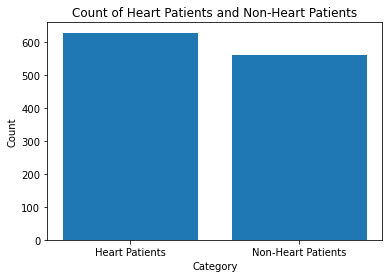

In [15]:
plt.bar(['Heart Patients', 'Non-Heart Patients'], [heart_count, non_heart_count])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Heart Patients and Non-Heart Patients')
plt.show()

In [16]:
# Printing the confusion matrices and accuracies
print("Decision Tree Confusion Matrix:")
print(dt_cm)
print("Decision Tree Accuracy:", dt_accuracy)

print("Logistic Regression Confusion Matrix:")
print(logreg_cm)
print("Logistic Regression Accuracy:", logreg_accuracy)

print("XGBoost Confusion Matrix:")
print(xgb_cm)
print("XGBoost Accuracy:", xgb_accuracy)

Decision Tree Confusion Matrix:
[[101   6]
 [ 16 115]]
Decision Tree Accuracy: 0.907563025210084
Logistic Regression Confusion Matrix:
[[ 90  17]
 [ 16 115]]
Logistic Regression Accuracy: 0.8613445378151261
XGBoost Confusion Matrix:
[[ 99   8]
 [  5 126]]
XGBoost Accuracy: 0.9453781512605042


In [17]:
def show_confusion_matrix():
    logreg_accuracy = accuracy_score(y_test, logreg_preds)
    logreg_cm = confusion_matrix(y_test, logreg_preds)

    xgb_accuracy = accuracy_score(y_test, xgb_preds)
    xgb_cm = confusion_matrix(y_test, xgb_preds)
    
    # Create the main window
    root = tk.Tk()
    root.title("Confusion Matrix")
    
    # Create a color palette for the heatmap
    cmap = "Blues"
    
    # Plot the confusion matrix for logistic regression
    logreg_cm_figure, logreg_ax = plt.subplots(figsize=(5, 5))
    logreg_cm_figure.canvas.set_window_title("Confusion Matrix - Logistic Regression")
    logreg_cm = confusion_matrix(y_test, logreg_preds)
    sns.heatmap(logreg_cm, annot=True, cmap=cmap, fmt="d", cbar=False, ax=logreg_ax)
    
    # Add labels to the confusion matrix
    logreg_ax.set_xlabel('Predicted')
    logreg_ax.set_ylabel('Actual')
    logreg_ax.set_title('Confusion Matrix - Logistic Regression\nHeart Disease Patients Count: {}\nNon-Heart Disease Patients Count: {}'.format(heart_patient_count, non_heart_patient_count))

    # Plot the confusion matrix for XGBoost
    xgb_cm_figure, xgb_ax = plt.subplots(figsize=(5, 5))
    xgb_cm_figure.canvas.set_window_title("Confusion Matrix - XGBoost")
    xgb_cm = confusion_matrix(y_test, xgb_preds)
    sns.heatmap(xgb_cm, annot=True, cmap=cmap, fmt="d", cbar=False, ax=xgb_ax)
    
    # Add labels to the confusion matrix
    xgb_ax.set_xlabel('Predicted')
    xgb_ax.set_ylabel('Actual')
    xgb_ax.set_title('Confusion Matrix - XGBoost\nHeart Disease Patients Count: {}\nNon-Heart Disease Patients Count: {}'.format(heart_patient_count, non_heart_patient_count))

    # Display the confusion matrices
    plt.show()

    # Display the confusion matrices and counts
    cm_window = tk.Toplevel(root)
    
    # Add the confusion matrices to the new window
    cm_figure, (logreg_ax, xgb_ax) = plt.subplots(1, 2, figsize=(10, 5))
    sns.heatmap(logreg_cm, annot=True, cmap="Blues", fmt="d", ax=logreg_ax)
    sns.heatmap(xgb_cm, annot=True, cmap="Blues", fmt="d", ax=xgb_ax)
    
    # Customize the color for heart disease patients and non-heart disease patients
    logreg_ax.add_patch(plt.Rectangle((0, 0), 1, 1, fc='none', edgecolor='r', lw=2))
    xgb_ax.add_patch(plt.Rectangle((0, 0), 1, 1, fc='none', edgecolor='r', lw=2))

    logreg_ax.set_title("Logistic Regression")
    xgb_ax.set_title("XGBoost")
    plt.tight_layout()
    cm_canvas = FigureCanvasTkAgg(cm_figure, master=cm_window)
    cm_canvas.draw()
    cm_canvas.get_tk_widget().pack()
    logreg_ax.set_title("Logistic Regression")
    xgb_ax.set_title("XGBoost")
    plt.tight_layout()
    cm_canvas = FigureCanvasTkAgg(cm_figure, master=cm_window)
    cm_canvas.draw()
    cm_canvas.get_tk_widget().pack()
    
    # Display the counts
    count_label = tk.Label(cm_window, text=f"Heart Patients Count: {heart_patient_count}\nNon-Heart Patients Count: {non_heart_patient_count}")
    count_label.pack()

    # Run the main event loop
    root.mainloop()

In [18]:
# Split the dataset into features and target
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Fit and predict using Logistic Regression with increased max_iter
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_cm = confusion_matrix(y_test, logreg_pred)
logreg_accuracy = (logreg_cm[0, 0] + logreg_cm[1, 1]) / sum(sum(logreg_cm))


Text(33.0, 0.5, 'Actual')

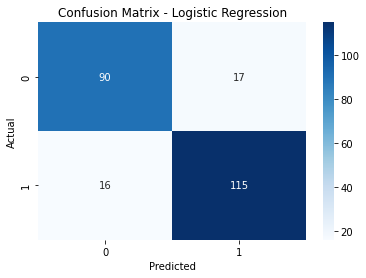

In [21]:
# Create confusion matrix figure for logistic regression
logreg_cm_figure = plt.figure(figsize=(6, 4))
logreg_ax = logreg_cm_figure.add_subplot(1, 1, 1)
logreg_cm_plot = sns.heatmap(logreg_cm, annot=True, cmap="Blues", fmt="d", ax=logreg_ax)
logreg_ax.set_title("Confusion Matrix - Logistic Regression")
logreg_ax.set_xlabel("Predicted")
logreg_ax.set_ylabel("Actual")

Text(33.0, 0.5, 'Actual')

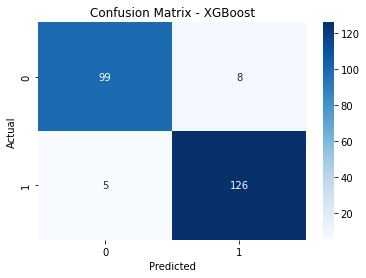

In [22]:
# Create confusion matrix figure for XGBoost
xgb_cm_figure = plt.figure(figsize=(6, 4))
xgb_ax = xgb_cm_figure.add_subplot(1, 1, 1)
xgb_cm_plot = sns.heatmap(xgb_cm, annot=True, cmap="Blues", fmt="d", ax=xgb_ax)
xgb_ax.set_title("Confusion Matrix - XGBoost")
xgb_ax.set_xlabel("Predicted")
xgb_ax.set_ylabel("Actual")

In [23]:
# Fit and predict using XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [ ]:
# Create the main window
root = tk.Tk()
root.title("Confusion Matrix")

# Add a label to display the dataset size and counts
dataset_label = tk.Label(root, text=f"Dataset Size: {dataset_size}\nHeart Patients Count: {heart_patient_count}\nNon-Heart Patients Count: {non_heart_patient_count}")
dataset_label.pack()

# Add a button to show the confusion matrix
cm_button = tk.Button(root, text="Show Confusion Matrix", command=show_confusion_matrix)
cm_button.pack()

# Display the confusion matrices
cm_window = tk.Toplevel(root)
logreg_cm_canvas = FigureCanvasTkAgg(logreg_cm_figure, master=cm_window)
logreg_cm_canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
xgb_cm_canvas = FigureCanvasTkAgg(xgb_cm_figure, master=cm_window)
xgb_cm_canvas.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)

# Add counts of heart disease patients and non-heart disease patients to the GUI
counts_label = tk.Label(cm_window, text=f"Dataset size: {len(X)}\nHeart disease count: {heart_disease_count}\nNon-heart disease count: {non_heart_disease_count}")
counts_label.pack()

# Display the confusion matrices and counts
cm_window = tk.Toplevel(root)

# Add the confusion matrices to the new window
logreg_ax = logreg_cm_figure.add_subplot(1, 1, 1)
xgb_ax = xgb_cm_figure.add_subplot(1, 1, 1)

logreg_cm_plot = sns.heatmap(logreg_cm, annot=True, cmap="Blues", fmt="d", ax=logreg_ax)
xgb_cm_plot = sns.heatmap(xgb_cm, annot=True, cmap="Blues", fmt="d", ax=xgb_ax)

logreg_ax.set_title("Confusion Matrix - Logistic Regression")
logreg_ax.set_xlabel("Predicted")
logreg_ax.set_ylabel("Actual")

xgb_ax.set_title("Confusion Matrix - XGBoost")
xgb_ax.set_xlabel("Predicted")
xgb_ax.set_ylabel("Actual")

logreg_cm_canvas = FigureCanvasTkAgg(logreg_cm_figure, master=cm_window)
logreg_cm_canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
xgb_cm_canvas = FigureCanvasTkAgg(xgb_cm_figure, master=cm_window)
xgb_cm_canvas.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)

# Add counts of heart disease patients and non-heart disease patients to the GUI
counts_label = tk.Label(cm_window, text=f"Dataset size: {len(X)}\nHeart disease count: {heart_disease_count}\nNon-heart disease count: {non_heart_disease_count}")
counts_label.pack()


# Run the main event loop
root.mainloop()